In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Get data
df = pd.read_csv('physics_discoveries.csv')
df

,Date,Person,Discovery,Country of origin
0,250 BCE,Archimedes,Archimedes' principle,Greece
1,1514,Nicholas Copernicus,Heliocentrism,Poland
2,1589,Galileo Galilei,Galileo's Leaning Tower of Pisa experiment,Italy
3,1609,Kepler,Kepler's first law of planetary motion,Germany
4,1609,Kepler,Kepler's second law of planetary motion,Germany
...,...,...,...,...
87,2000,Multiple,Tau neutrino discovered,Multiple
88,2003,Multiple,WMAP observations of cosmic microwave background,Multiple
89,2012,Peter Higgs,Higgs Boson discovered,UK
90,2015,Multiple,Gravitational waves detected,Multiple


## Line chart of the number of discoveries over time

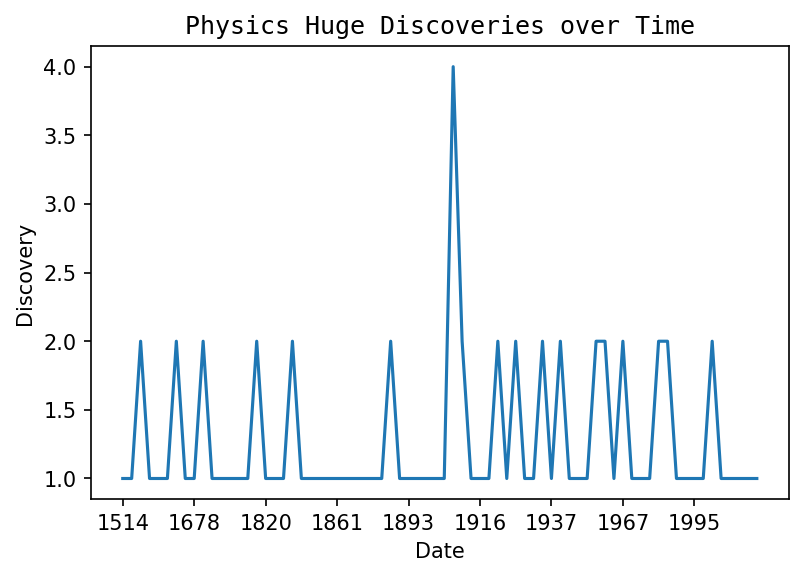

In [4]:
discoveries = df.groupby('Date', as_index=False).count()

# Change figure dpi
plt.figure(dpi=150)
# Plot line
c = sns.lineplot(x='Date', y='Discovery', data=discoveries)
# Add title
plt.title('Physics Huge Discoveries over Time', fontdict={'fontfamily': 'monospace'})
# Change xticks
c.set(xticks=discoveries.Date[0::8])
# Show plot
plt.show()

## Bar Chart of the number of discoveries per century

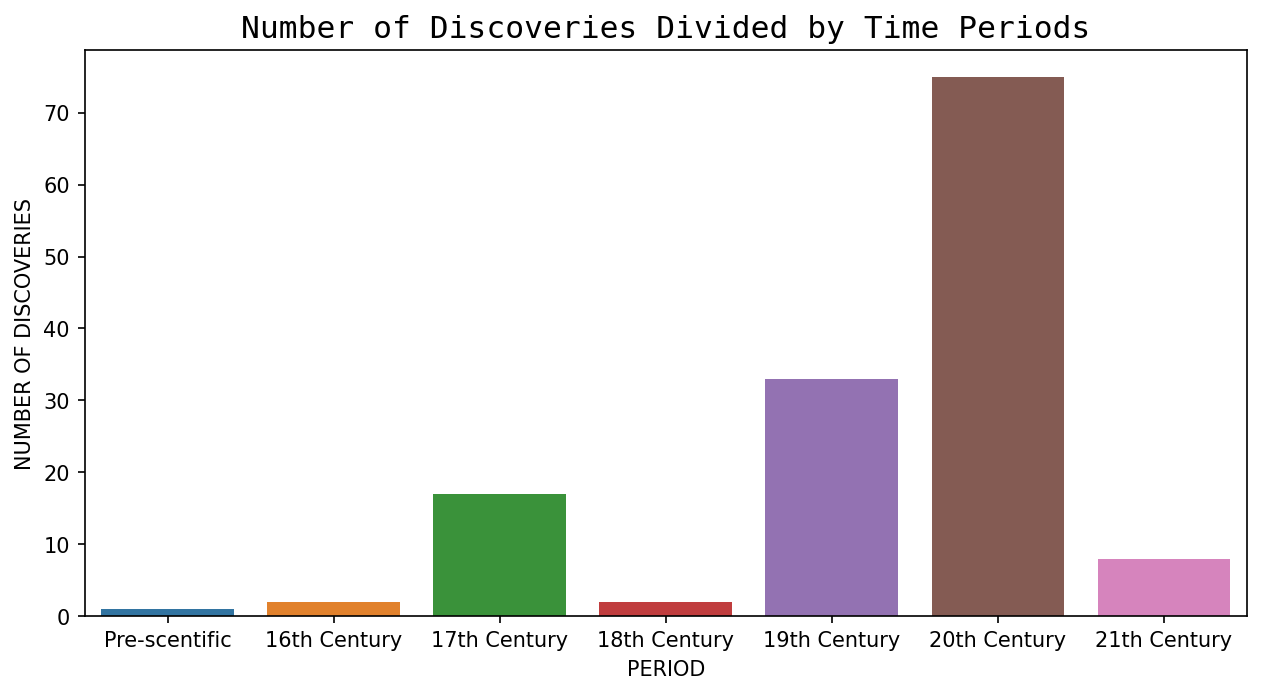

In [5]:
# Data frame of dates
dates = df.Date
# Data frames for each epoch
pre_scentific = df.iloc[:1]
century_16th = pd.DataFrame()
century_17th = pd.DataFrame()
century_18th = pd.DataFrame()
century_19th = pd.DataFrame()
century_20th = pd.DataFrame()
century_21th = pd.DataFrame()

# Add data to each dataframe
for date in dates:
    item = df.loc[df.Date == date]
    if date[:2] == '15':
        century_16th = century_16th.append(item, ignore_index=True)
    elif date[:2] == '16':
        century_17th = century_17th.append(item, ignore_index=True) 
    elif date[:2] == '17':
        century_18th = century_18th.append(item, ignore_index=True)
    elif date[:2] == '18':
        century_19th = century_19th.append(item, ignore_index=True)
    elif date[:2] == '19':
        century_20th = century_20th.append(item, ignore_index=True)
    elif date[:2] == '20':
        century_21th = century_21th.append(item, ignore_index=True)

# Create the data frame that will be ploted
bar_df = pd.DataFrame({
    'PERIOD': [
        'Pre-scentific', 
        '16th Century', 
        '17th Century', 
        '18th Century', 
        '19th Century', 
        '20th Century', 
        '21th Century'
    ],
    'NUMBER OF DISCOVERIES': [
        pre_scentific.Discovery.count(), 
        century_16th.Discovery.count(), 
        century_17th.Discovery.count(),
        century_18th.Discovery.count(),
        century_19th.Discovery.count(),
        century_20th.Discovery.count(),
        century_21th.Discovery.count()
    ]
})

# Change figure size
plt.figure(figsize=(10, 5), dpi=150)
# Add title
plt.title('Number of Discoveries Divided by Time Periods', fontdict={'fontfamily': 'monospace', 'fontsize': 15})
# Plot graph
sns.barplot(x='PERIOD', y='NUMBER OF DISCOVERIES', data=bar_df)
# Show plot
plt.show()

## Histogram of the location of the discoveries

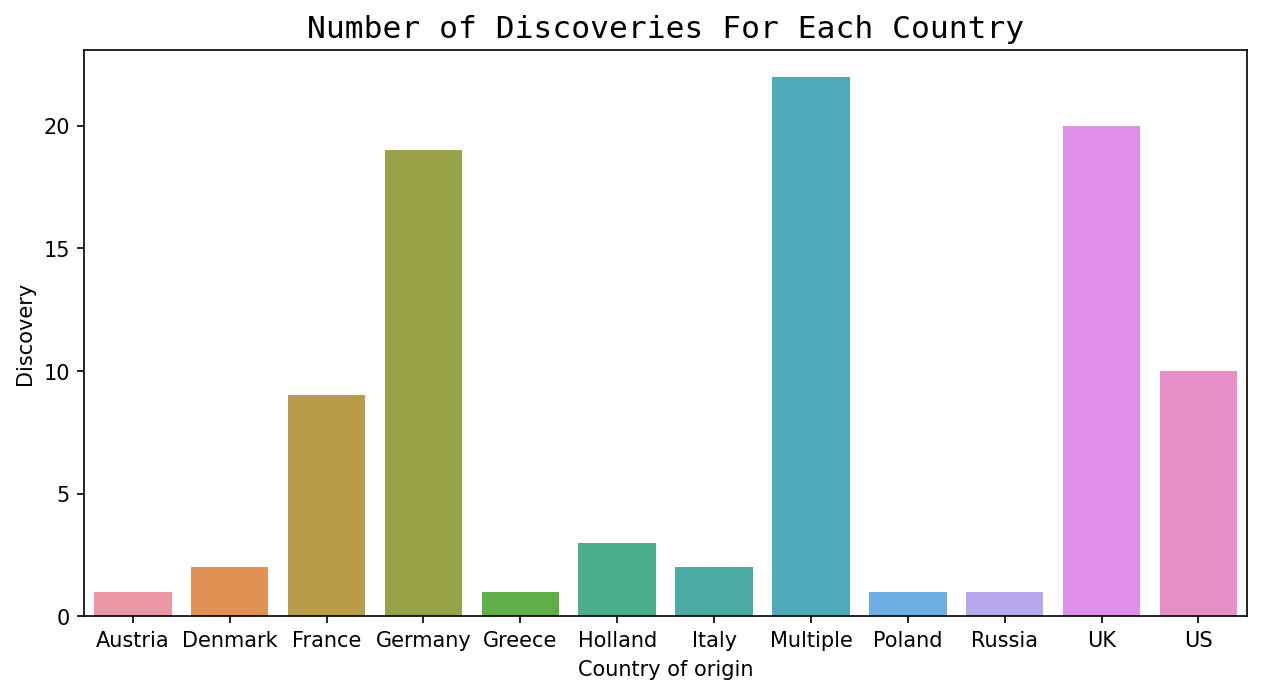

In [6]:
# Create country data frame
country_df = df.groupby(['Country of origin']).count()

# Change figure size
plt.figure(figsize=(10, 5), dpi=150)
# Add title
plt.title('Number of Discoveries For Each Country', fontdict={'fontfamily': 'monospace', 'fontsize': 15})
# Plot graph
sns.barplot(x=country_df.index, y='Discovery', data=country_df)
# Show plot
plt.show()

## Number of discoveries moving from Europe to America, and increase of discoveries made by group of people form different nationalities over time

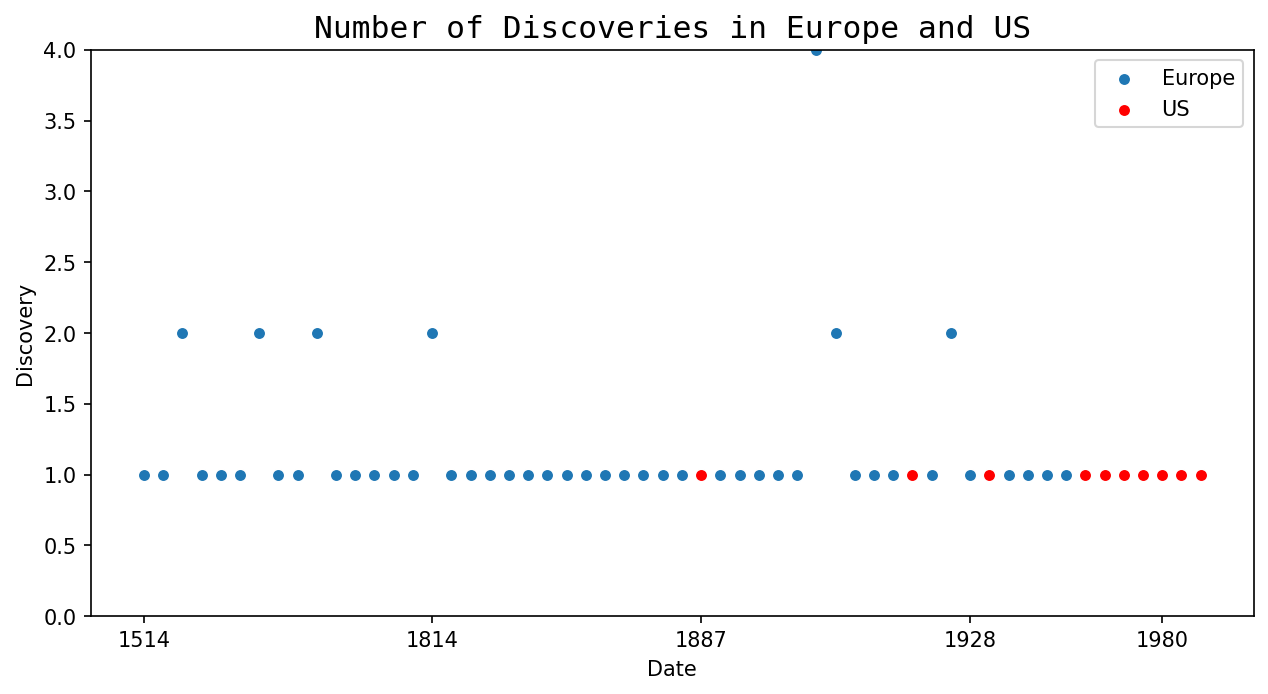

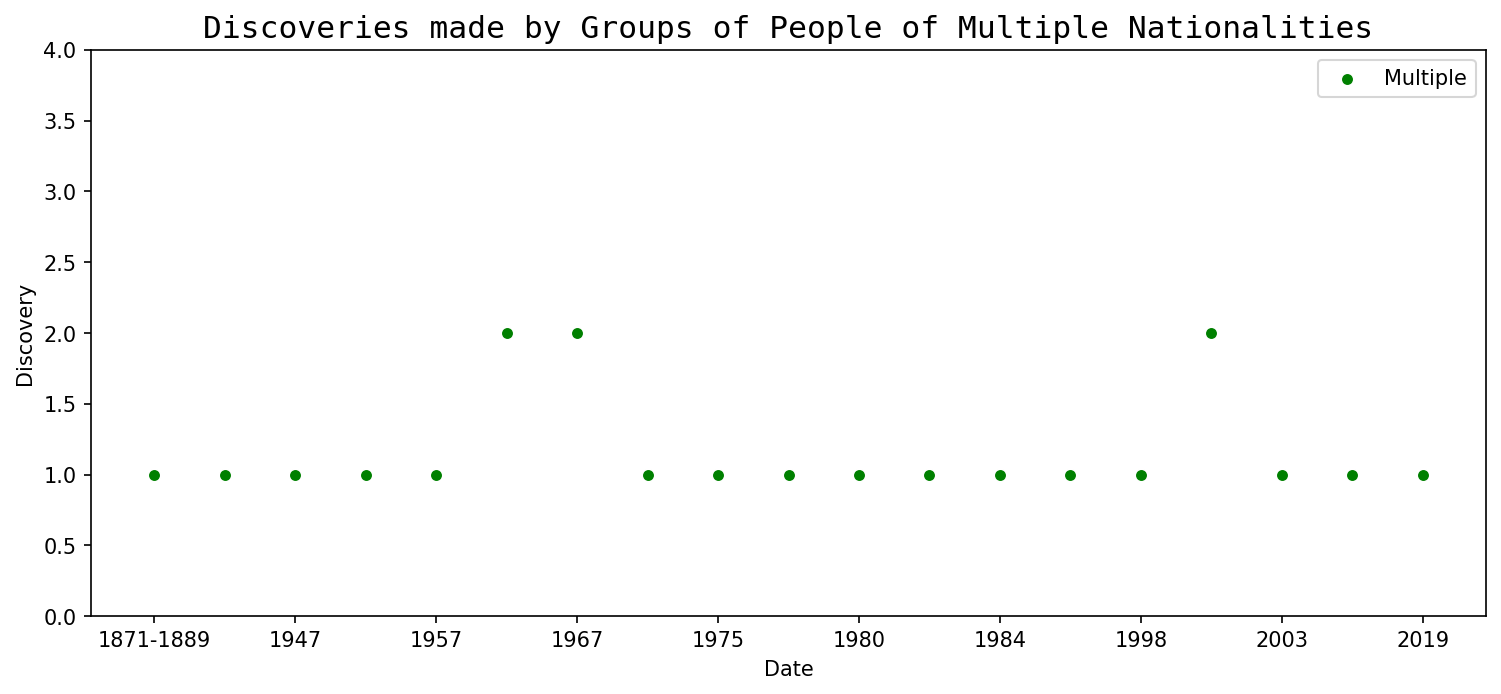

In [14]:
# Create new dataframes for europe, us, and multiple nationalities
europe_df = pd.DataFrame()
us_df = pd.DataFrame()
multiple_df = pd.DataFrame()

# Add data to the data frames (europe_df, us_df, multiple_df)
for c in df['Country of origin']:
    if c == 'Austria' or c == 'Denmark' or c == 'France' or c == 'Germany' or c == 'Greece' or c == 'Holland' or c == 'Italy' or c == 'Poland' or c == 'UK': 
        item = df.loc[df['Country of origin'] == c]
        europe_df = europe_df.append(item, ignore_index=True)
    elif c == 'US':
        item = df.loc[df['Country of origin'] == c]
        us_df = us_df.append(item, ignore_index=True)
    elif c == 'Multiple':
        item = df.loc[df['Country of origin'] == c]
        multiple_df = multiple_df.append(item, ignore_index=True)

# Drop duplicates from data frames
europe_df.drop_duplicates(inplace=True, ignore_index=True)
us_df.drop_duplicates(inplace=True, ignore_index=True)
multiple_df.drop_duplicates(inplace=True, ignore_index=True)

# Create discovery data frames
europe_discoveries = europe_df.groupby('Date', as_index=False).count()
us_discoveries = us_df.groupby('Date', as_index=False).count()
multiple_discoveries = multiple_df.groupby('Date', as_index=False).count()

# FIRST scatterplot of Europe and US discoveries
plt.figure(figsize=(10, 5), dpi=150)

plt.title('Number of Discoveries in Europe and US', fontdict={'fontfamily': 'monospace', 'fontsize': 15})
# plot chart
c = sns.scatterplot(x='Date', y='Discovery', data=europe_discoveries, label='Europe')
c = sns.scatterplot(x='Date', y='Discovery', data=us_discoveries, label='US', color='red')
# set x ticks and y axis limit
c.set(xticks=discoveries.Date[0::15], ylim=[0, 4])

plt.show()

# SECOND scatterplot of multiple natinality discoveries
plt.figure(figsize=(12, 5), dpi=150)
plt.title('Discoveries made by Groups of People of Multiple Nationalities', fontdict={'fontfamily': 'monospace', 'fontsize': 15})
# plot chart
c = sns.scatterplot(x='Date', y='Discovery', data=multiple_discoveries, label='Multiple', color='green')
# set x ticks and y axis limit
c.set(xticks=multiple_discoveries.Date[0::2], ylim=[0, 4])

plt.show()

### Number of discoveries made by groups of people with different nationalities over time

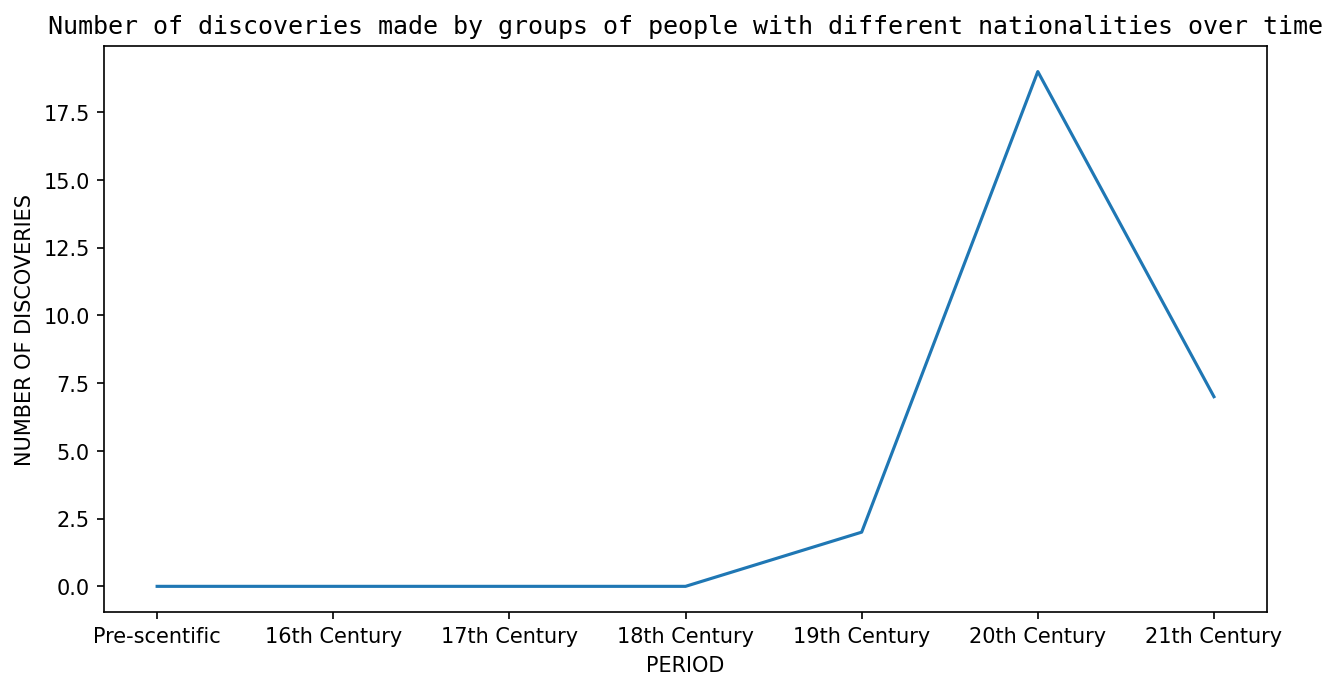

In [9]:
# Data frame of dates
dates = multiple_df.Date
# Data frames for each epoch
pre_scentific = pd.DataFrame()
century_16th = pd.DataFrame()
century_17th = pd.DataFrame()
century_18th = pd.DataFrame()
century_19th = pd.DataFrame()
century_20th = pd.DataFrame()
century_21th = pd.DataFrame()

# Add data to each dataframe
for date in dates:
    item = multiple_df.loc[multiple_df.Date == date]
    if date[:2] == '15':
        century_16th = century_16th.append(item, ignore_index=True)
    elif date[:2] == '16':
        century_17th = century_17th.append(item, ignore_index=True) 
    elif date[:2] == '17':
        century_18th = century_18th.append(item, ignore_index=True)
    elif date[:2] == '18':
        century_19th = century_19th.append(item, ignore_index=True)
    elif date[:2] == '19':
        century_20th = century_20th.append(item, ignore_index=True)
    elif date[:2] == '20':
        century_21th = century_21th.append(item, ignore_index=True)

# Create the data frame that will be ploted
line_df = pd.DataFrame({
    'PERIOD': [
        'Pre-scentific', 
        '16th Century', 
        '17th Century', 
        '18th Century', 
        '19th Century', 
        '20th Century', 
        '21th Century'
    ],
    'NUMBER OF DISCOVERIES': [
        0, 
        0, 
        0,
        0,
        century_19th.Discovery.count(),
        century_20th.Discovery.count(),
        century_21th.Discovery.count()
    ]
})

# Plot line charts
plt.figure(figsize=(10, 5), dpi=150)
# Add title
plt.title('Number of discoveries made by groups of people with different nationalities over time', fontdict={'fontfamily': 'monospace', 'fontsize': 12})
# Plot graph
c = sns.lineplot(x='PERIOD', y='NUMBER OF DISCOVERIES', data=line_df, sort=False)

plt.show()